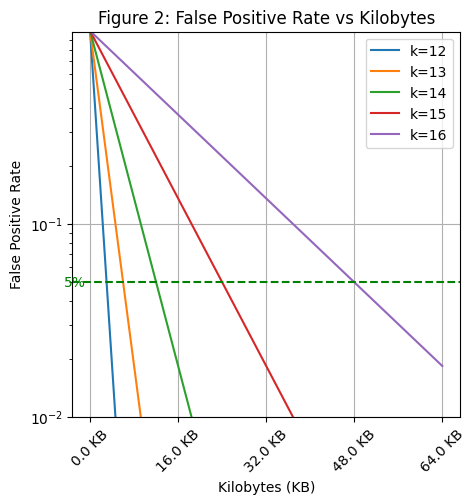

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for the probability of a false positive
def fpr(n, k):
    return (1 - 2**(-(k+1)))**n

def log_fpr(n, k):
    return n * np.log(1 - 2**(-(k+1)))

# Define the function for the logarithm of the probability of a false positive
def log_fpr2(n, k):
    return n * np.log1p(-2**(-(k+1)))
# Values of n (number of trials)

def get_bits_from_kb(kbytes):
    nbytes = kbytes * 1024
    nbits = nbytes * 8
    return nbits

n_bits_2 = get_bits_from_kb(np.arange(0, 65, 16))

# Values of k to consider
k_values_2 = [12, 13, 14, 15, 16]

# Plotting
plt.figure(figsize=(5, 5))

for k in k_values_2:
    prob_values = log_fpr2(n_bits_2, k)
    plt.plot(n_bits_2, np.exp(prob_values), label=f'k={k}')

plt.xlabel('Kilobytes (KB)')
plt.ylabel('False Positive Rate')
plt.title('Figure 2: False Positive Rate vs Kilobytes')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Use logarithmic scale for y-axis if needed

# let's plot the .05 threshold
plt.axhline(y=0.05, color='g', linestyle='--')
# label the threshold
plt.text(-6000, 0.0475, '5%', color='g', ha='right')

# set the y range from .01 to .5
plt.ylim(.01, .99)

# let's change the units on the x-axis to KB
plt.xticks(n_bits_2, [f'{x/1024/8:.1f} KB' for x in n_bits_2])
# angle the x-axis labels
plt.xticks(rotation=45)


# save PNG
plt.savefig('fpr_vs_size_large.png')


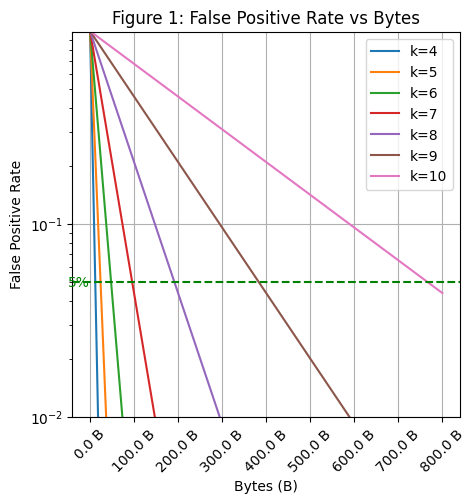

In [3]:
def get_bits_from_bytes(b):
    nbits = b * 8
    return nbits

n_bits_1 = get_bits_from_bytes(np.arange(0, 801, 100))
# Values of k to consider
k_values_1 = [4, 5, 6, 7, 8, 9, 10]

# Plotting
plt.figure(figsize=(5, 5))

for k in k_values_1:
    prob_values = log_fpr2(n_bits_1, k)
    plt.plot(n_bits_1, np.exp(prob_values), label=f'k={k}')

plt.xlabel('Bytes (B)')
plt.ylabel('False Positive Rate')
plt.title('Figure 1: False Positive Rate vs Bytes')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Use logarithmic scale for y-axis if needed

# let's plot the .05 threshold
plt.axhline(y=0.05, color='g', linestyle='--')
# label the threshold
plt.text(0, 0.0475, '5%', color='g', ha='right')

# set the y range from .01 to .5
plt.ylim(.01, .99)

# let's change the units on the x-axis to KB
plt.xticks(n_bits_1, [f'{x/8:.1f} B' for x in n_bits_1])
# angle the x-axis labels
plt.xticks(rotation=45)


# save PNG
plt.savefig('fpr_vs_size_small.png')


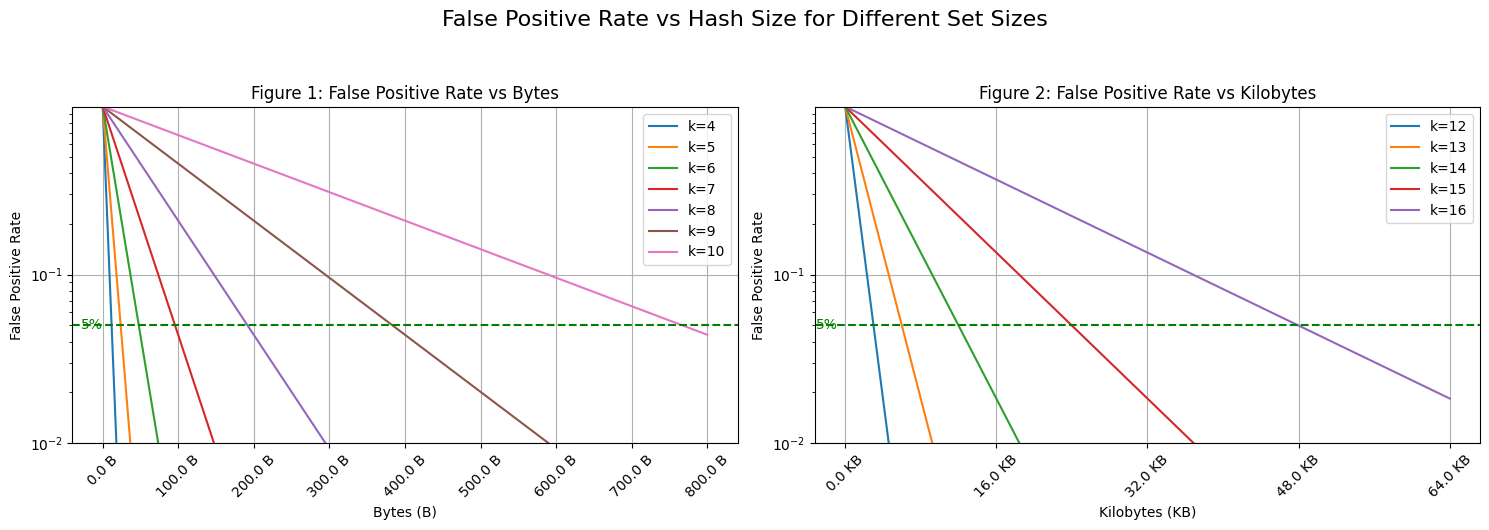

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for the probability of a false positive
def log_fpr2(n, k):
    return n * np.log1p(-2**(-(k+1)))

# Define function to convert KB to bits
def get_bits_from_kb(kbytes):
    nbytes = kbytes * 1024
    nbits = nbytes * 8
    return nbits

# Define function to convert bytes to bits
def get_bits_from_bytes(b):
    nbits = b * 8
    return nbits

# Values of k to consider
k_values_1 = [4, 5, 6, 7, 8, 9, 10]
k_values_2 = [12, 13, 14, 15, 16]

# Values of n (number of trials)
n_bits_1 = get_bits_from_bytes(np.arange(0, 801, 100))
n_bits_2 = get_bits_from_kb(np.arange(0, 65, 16))

# Creating the subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting Figure 1
for k in k_values_1:
    prob_values = log_fpr2(n_bits_1, k)
    axs[0].plot(n_bits_1, np.exp(prob_values), label=f'k={k}')

axs[0].set_xlabel('Bytes (B)')
axs[0].set_ylabel('False Positive Rate')
axs[0].set_title('Figure 1: False Positive Rate vs Bytes')
axs[0].legend()
axs[0].grid(True)
axs[0].set_yscale('log')
axs[0].axhline(y=0.05, color='g', linestyle='--')
axs[0].text(0, 0.0475, '5%', color='g', ha='right')
axs[0].set_ylim(.01, .99)
axs[0].set_xticks(n_bits_1)
axs[0].set_xticklabels([f'{x/8:.1f} B' for x in n_bits_1], rotation=45)

# Plotting Figure 2
for k in k_values_2:
    prob_values = log_fpr2(n_bits_2, k)
    axs[1].plot(n_bits_2, np.exp(prob_values), label=f'k={k}')

axs[1].set_xlabel('Kilobytes (KB)')
axs[1].set_ylabel('False Positive Rate')
axs[1].set_title('Figure 2: False Positive Rate vs Kilobytes')
axs[1].legend()
axs[1].grid(True)
axs[1].set_yscale('log')
axs[1].axhline(y=0.05, color='g', linestyle='--')
axs[1].text(-6000, 0.0475, '5%', color='g', ha='right')
axs[1].set_ylim(.01, .99)
axs[1].set_xticks(n_bits_2)
axs[1].set_xticklabels([f'{x/1024/8:.1f} KB' for x in n_bits_2], rotation=45)

plt.suptitle('False Positive Rate vs Hash Size for Different Set Sizes', y=1.05, fontsize=16)
plt.tight_layout()

# Save the combined plot
plt.savefig('combined_fpr_vs_size.png')

# Display the plot
plt.show()


In [12]:
def log_fpr_two_level(k, w, q):
    return (q-w) * np.log1p(-2**(-(k / 2**w + 1)))

def bit_size_two_level(w, q):
    return 2**w * (q-w)

print(bit_size_two_level(8, 15))


1792


In [1]:


# Values of k to consider
k_values_3 = [10000, 15000]

# Plotting
plt.figure(figsize=(5, 5))

qs = [128, 256]
ws = [8, 10, 12]
n_bits_3 = []
for q in qs:
    for w in ws:
        bits = bit_size_two_level(w, q)
        n_bits_3.append(bits)
print(n_bits_3)
print(f"{qs=}, {ws=}, {n_bits_3=}")


for q in qs:
    for w in ws:
        bits = bit_size_two_level(w, q)
        #n_bits_3.append(bits)

        prob_values = []
        for k in k_values_3:  
            prob_values.append(np.exp(log_fpr_two_level(k, w, q)))
        plt.plot([bits, bits], prob_values, label=f'k={k}')

plt.xlabel('Kilobyte (B)')
plt.ylabel('False Positive Rate')
plt.title('Figure 3: False Positive Rate vs Bytes')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Use logarithmic scale for y-axis if needed

# let's plot the .05 threshold
plt.axhline(y=0.05, color='g', linestyle='--')
# label the threshold
plt.text(0, 0.0475, '5%', color='g', ha='right')

# set the y range from .01 to .5
plt.ylim(.01, .99)

# let's change the units on the x-axis to KB
plt.xticks(n_bits_3, [f'{x/8/1024:.1f} KB' for x in n_bits_3])
# angle the x-axis labels
plt.xticks(rotation=45)


# save PNG
plt.savefig('fpr_vs_size_two_level.png')





NameError: name 'plt' is not defined

In [ ]:


# Values of k to consider
ks = [512, 1024, 1536]
qs = [32, 64, 128, 256, 512]
w = 8
n_bits_3 = []
for q in qs:
    bits = bit_size_two_level(w, q)
    n_bits_3.append(bits)
print(n_bits_3)

for k in k_values_3:

    prob_values = []
    for q in qs:
        prob_values.append(np.exp(log_fpr_two_level(k, w, q)))
    print(f"{k=}, {prob_values=}")
    plt.plot(n_bits_3, prob_values, label=f'k={k}')

plt.xlabel('Bytes (B)')
plt.ylabel('False Positive Rate')
plt.title('Figure 3: False Positive Rate vs Bytes')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Use logarithmic scale for y-axis if needed

# let's plot the .05 threshold
plt.axhline(y=0.05, color='g', linestyle='--')
# label the threshold
plt.text(0, 0.0475, '5%', color='g', ha='right')

# set the y range from .01 to .5
plt.ylim(.01, .99)

# let's change the units on the x-axis to KB
plt.xticks(n_bits_3, [f'{x/8:.1f} B' for x in n_bits_3])
# angle the x-axis labels
plt.xticks(rotation=45)


# save PNG
plt.savefig('fpr_vs_size_two_level.png')





In [46]:
def log_fpr_one_level(k, q):
    return q * np.log1p(-2**(-(k+1)))


def log_fpr_two_level(k, w, q):
    return (q-w) * np.log1p(-2**(-(k / 2**w + 1)))

def bit_size_two_level(w, q):
    return 2**w * (q-w)

# for a given log_fpr_two_level and a given k, let's find the w and q that minimize the bit size
def find_w_q(k, target_log_fpr):
    min_bit_size = float('inf')
    best_w = None
    best_q = None
    for w in range(1, 20, 1):
        # q0 is smallest integer greater than w that is a multiple of x
        #x = 1
        #q0 = w + 8 - w % x
        for q in range(w+1, 1000000, 1):
            log_fpr = log_fpr_two_level(k, w, q)
            if log_fpr - target_log_fpr:
                bits = bit_size_two_level(w, q)                
                if bits < min_bit_size:
                    min_bit_size = bits
                    best_w = w
                    best_q = q
                    print(f"{best_w=}, {best_q=}, {log_fpr=}, {bits=}")

    return best_w, best_q, min_bit_size


In [47]:
k = 100000
import numpy as np
target_fpr = .05
target_log_fpr = np.log(target_fpr)

w, q, size = find_w_q(k, target_log_fpr)

print(f"{w=}, {q=}, {size=}, bits per element: {size/k}")

best_w=1, best_q=2, log_fpr=-0.0, bits=2


w=1, q=2, size=2, bits per element: 2e-05
